# Web archives

How to:

- get a capture near a date
- get a list of captures (timemap or cdx)
- get captures from a domain
- get the original html

In [15]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/GLAM-Workbench/trove-web-archives-titles/main/pandora-titles.csv")

In [16]:
df.head()

,tep_id,name,gathered_url,surt
0,/tep/94042,OLSC submission in response to the NSW...,http://www.lawlink.nsw.gov.au/lawlink/olsc/ll_...,"au,gov,nsw,lawlink)/lawlink/olsc/ll_olsc.nsf/p..."
1,/tep/162201,2017-18 Federal Pre-Budget Submission (Austra...,http://www.acoss.org.au/wp-content/uploads/201...,"au,org,acoss)/wp-content/uploads/2017/02/acoss..."
2,/tep/128226,A framework for assessing the biological risk...,http://www.dse.vic.gov.au/,"au,gov,vic,dse)/"
3,/tep/157892,Acknowledgment and publicity guidelines for V...,http://dhhs.vic.gov.au/,"au,gov,vic,dhhs)/"
4,/tep/147101,Administration and effectiveness of the envir...,http://www.audit.vic.gov.au/publications/20140...,"au,gov,vic,audit)/publications/20140625-ecl-ad..."


In [19]:
df["domain"] = df["surt"].str.extract(r"(.*?)\)")
df["domain"] = df["domain"].dropna().apply(lambda x: ".".join(reversed(x.split(","))))

In [20]:
df["domain"].value_counts()[:50]

domain
youtu.be                      4247
youtube.com                   2002
betterhealth.vic.gov.au       1390
mobile.twitter.com            1269
nitter.archive.org.au         1117
ww2.health.wa.gov.au          1027
health.gov.au                  853
dse.vic.gov.au                 841
abc.net.au                     616
home.vicnet.net.au             615
dpcd.vic.gov.au                424
health.vic.gov.au              422
vec.vic.gov.au                 377
esc.vic.gov.au                 330
dpi.vic.gov.au                 292
mediastatements.wa.gov.au      292
ahuri.edu.au                   280
levelcrossings.vic.gov.au      278
epanote2.epa.vic.gov.au        277
cfaonline.cfa.vic.gov.au       273
smh.com.au                     255
dhs.vic.gov.au                 243
museum.vic.gov.au              233
dest.gov.au                    233
environment.gov.au             219
education.vic.gov.au           217
health.nsw.gov.au              214
statistics.oesr.qld.gov.au     210
bsl.org.au   

Look at harvested titles - domains etc (using surts)git

In [5]:
df

,tep_id,name,gathered_url,surt,domain
0,/tep/94042,OLSC submission in response to the NSW...,http://www.lawlink.nsw.gov.au/lawlink/olsc/ll_...,"au,gov,nsw,lawlink)/lawlink/olsc/ll_olsc.nsf/p...","au,gov,nsw,lawlink"
1,/tep/162201,2017-18 Federal Pre-Budget Submission (Austra...,http://www.acoss.org.au/wp-content/uploads/201...,"au,org,acoss)/wp-content/uploads/2017/02/acoss...","au,org,acoss"
2,/tep/128226,A framework for assessing the biological risk...,http://www.dse.vic.gov.au/,"au,gov,vic,dse)/","au,gov,vic,dse"
3,/tep/157892,Acknowledgment and publicity guidelines for V...,http://dhhs.vic.gov.au/,"au,gov,vic,dhhs)/","au,gov,vic,dhhs"
4,/tep/147101,Administration and effectiveness of the envir...,http://www.audit.vic.gov.au/publications/20140...,"au,gov,vic,audit)/publications/20140625-ecl-ad...","au,gov,vic,audit"
...,...,...,...,...,...
87727,/tep/203222,Storytellers Distillery,https://storytellersdistillery.com.au/,"au,com,storytellersdistillery)/","au,com,storytellersdistillery"
87728,/tep/208701,"‘Everything is so expensive’ : tax cuts, cost ...",https://www.theguardian.com/australia-news/202...,"com,theguardian)/australia-news/2024/feb/25/ev...","com,theguardian"
87729,/tep/203931,‘Felt alienated by the men’s game’: how the cu...,https://theconversation.com/felt-alienated-by-...,"com,theconversation)/felt-alienated-by-the-men...","com,theconversation"
87730,/tep/195843,‘Kookaburra sits on the telegraph wire…’,https://stories.slsa.sa.gov.au/kookaburra-sits...,"au,gov,sa,slsa,stories)/kookaburra-sits-on-the...","au,gov,sa,slsa,stories"


In [21]:
from wordcloud import WordCloud

text = "\n".join(df["name"].to_list())

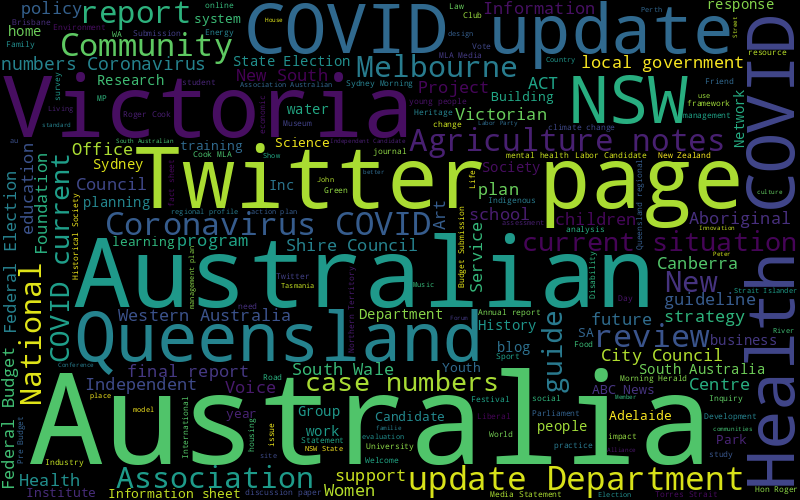

In [24]:
wc = WordCloud(width=800, height=500).generate(text)
wc.to_image()

In [27]:
df.loc[(df["name"].str.contains("COVID")) | (df["name"].str.contains("coronavirus"))]

,tep_id,name,gathered_url,surt,domain
28,/tep/182919,Coronavirus (COVID-19) Albany Travel and Cru...,http://www.albanytravelandcruise.com.au/corona...,"au,com,albanytravelandcruise)/corona-virus-alert",albanytravelandcruise.com.au
85,/tep/181347,Vision Australia's response to COVID-19,https://www.visionaustralia.org/COVID19,"org,visionaustralia)/covid19",visionaustralia.org
115,/tep/182754,"#COVID-19 All of us, together (The Greens)",https://greens.org.au/covid19,"au,org,greens)/covid19",greens.org.au
197,/tep/187840,02 coronavirus testing,https://youtu.be/S6O0gXsG4Co,"be,youtu)/s6o0gxsg4co",youtu.be
205,/tep/187838,06 are you worried about being diagnosed or te...,https://youtu.be/UidrqNy6PFg,"be,youtu)/uidrqny6pfg",youtu.be
...,...,...,...,...,...
86150,/tep/182099,Yarra's business package response to COVID-19 ...,https://youtu.be/chRhaOTTbas,"be,youtu)/chrhaottbas",youtu.be
86151,/tep/182100,Yarra's community package response to COVID-19...,https://youtu.be/pge05-14C90,"be,youtu)/pge05-14c90",youtu.be
86152,/tep/182101,Yarra's creative industries package response t...,https://youtu.be/Q8YuD6SzxyI,"be,youtu)/q8yud6szxyi",youtu.be
86405,/tep/181876,Your COVID-19 Resources hub (Chartered Account...,https://www.charteredaccountantsanz.com/news-a...,"com,charteredaccountantsanz)/news-and-analysis...",charteredaccountantsanz.com


In [32]:
yt = df.loc[df["domain"].isin(["youtu.be", "youtube.com"])]
text = "\n".join(yt["name"].to_list())

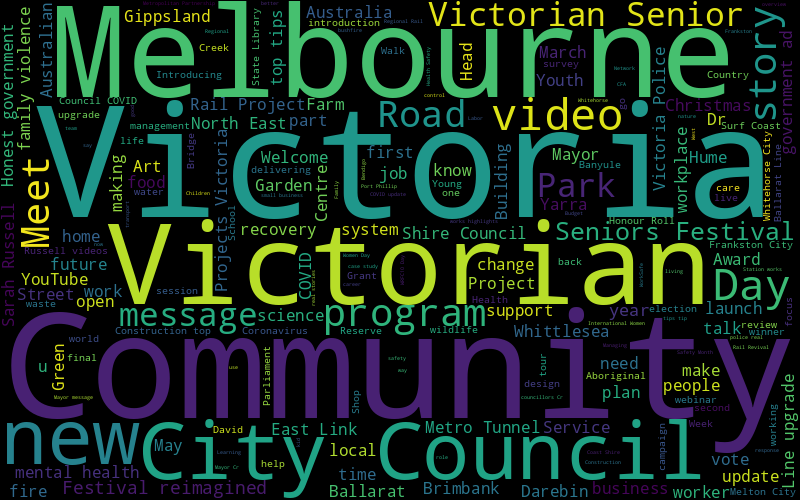

In [33]:
wc = WordCloud(width=800, height=500).generate(text)
wc.to_image()

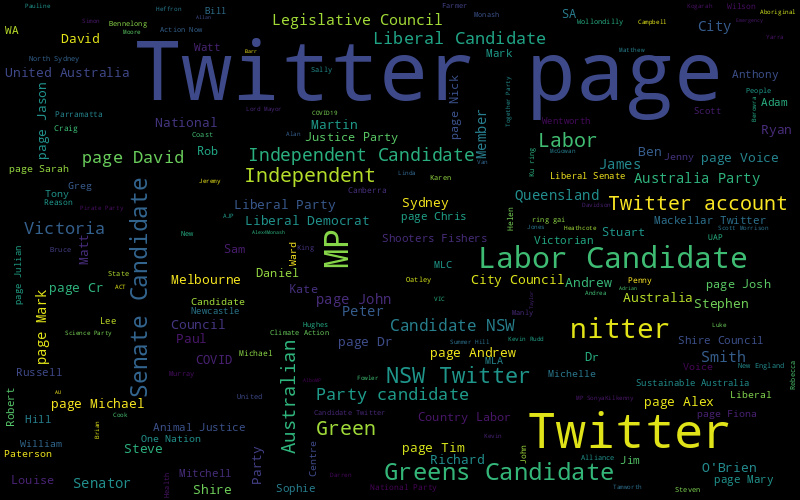

In [37]:
tw = df.loc[(df["domain"].str.contains("twitter")) | (df["domain"].str.contains("nitter"))]
text = "\n".join(tw["name"].to_list())
wc = WordCloud(width=800, height=500).generate(text)
wc.to_image()

In [36]:
tw

,tep_id,name,gathered_url,surt,domain
1436,/tep/191777,@LegCouncilSA (@legcouncilsa) | nitter,https://nitter.archive.org.au/legcouncilsa,"au,org,archive,nitter)/legcouncilsa",nitter.archive.org.au
3627,/tep/195211,Adam Gilchrist (@gilly381) | nitter,https://nitter.archive.org.au/gilly381,"au,org,archive,nitter)/gilly381",nitter.archive.org.au
3651,/tep/142326,AdamBandt [twitter page],https://mobile.twitter.com/AdamBandt,"com,twitter,mobile)/adambandt",mobile.twitter.com
3891,/tep/191696,"Adrian Pederick, MP (@AdrianPederick) | nitter",https://nitter.archive.org.au/AdrianPederick,"au,org,archive,nitter)/adrianpederick",nitter.archive.org.au
6067,/tep/191676,Andrea Michaels MP (@michaels_andrea) | nitter,https://nitter.archive.org.au/michaels_andrea,"au,org,archive,nitter)/michaels_andrea",nitter.archive.org.au
...,...,...,...,...,...
86677,/tep/136467,Zed Seselja [twitter page],http://mobile.twitter.com/ZedMLA,"com,twitter,mobile)/zedmla",mobile.twitter.com
86727,/tep/191748,Zoe Bettison MP (@ZoeBettisonMP) | nitter,https://nitter.archive.org.au/ZoeBettisonMP,"au,org,archive,nitter)/zoebettisonmp",nitter.archive.org.au
87129,/tep/191736,alex dinovitser (@alex_dinovitser) | nitter,https://nitter.archive.org.au/alex_dinovitser,"au,org,archive,nitter)/alex_dinovitser",nitter.archive.org.au
87194,/tep/158982,christina hobbs [twitter page] Senate Candidate,https://mobile.twitter.com/christina_act,"com,twitter,mobile)/christina_act",mobile.twitter.com
